# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [1]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test     set of %d examples." % len(X_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test     set of 10000 examples.


### 2. Visualize the First Six Training Images

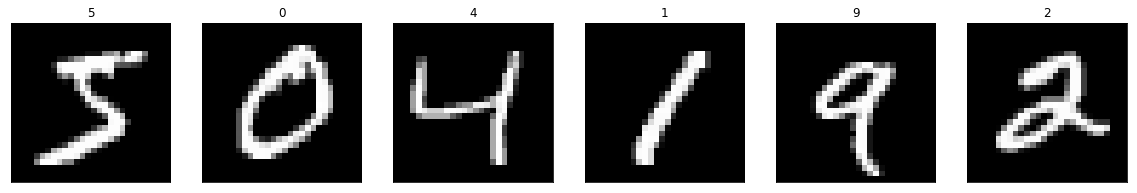

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

In [3]:
def visualize_input(img, ax):
    
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max() / 2.5

    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)),
                        xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')



import math
renderer = lambda c: (math.ceil(c) if c > .5 else 0)
render = np.vectorize(renderer)

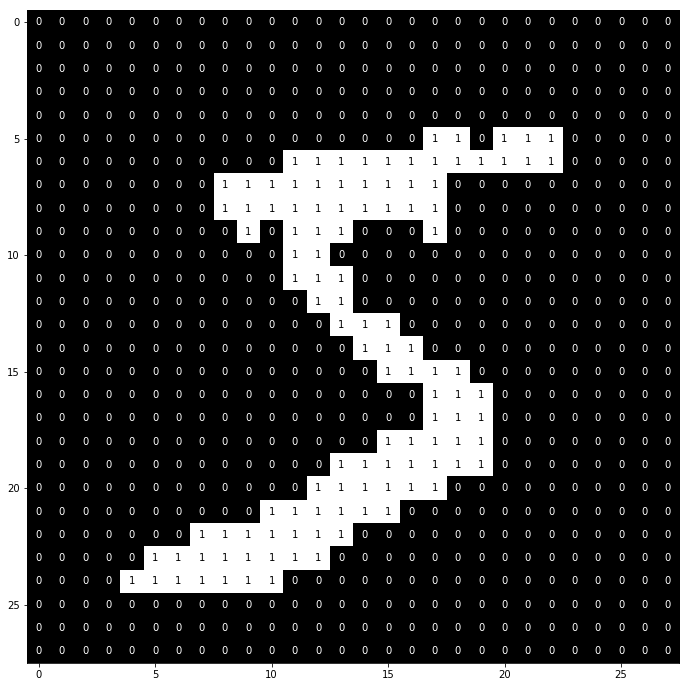

In [4]:
t = render(X_train[0]/255)

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(t, ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [5]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32') / 255

In [6]:
render_all = np.vectorize(render)

In [7]:
%time X_test  = render_all(X_test)
%time X_train = render_all(X_train)

CPU times: user 1min 26s, sys: 571 ms, total: 1min 26s
Wall time: 1min 26s
CPU times: user 9min 29s, sys: 12.4 s, total: 9min 41s
Wall time: 9min 45s


### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [8]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test  = np_utils.to_categorical(y_test,  10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 6. Define the Model Architecture

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten


# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 7. Compile the Model

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [11]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 6.8500%


### 9. Train the Model

In [12]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, save_best_only=True)

hist = model.fit(X_train, y_train,
                 batch_size=128, epochs=10,
                 validation_split=0.2,
                 callbacks=[checkpointer],
                 verbose=2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
Epoch 00000: val_loss improved from inf to 0.13687, saving model to mnist.model.best.hdf5
5s - loss: 0.2932 - acc: 0.9087 - val_loss: 0.1369 - val_acc: 0.9587
Epoch 2/10
Epoch 00001: val_loss improved from 0.13687 to 0.10096, saving model to mnist.model.best.hdf5
5s - loss: 0.1178 - acc: 0.9637 - val_loss: 0.1010 - val_acc: 0.9694
Epoch 3/10
Epoch 00002: val_loss did not improve
4s - loss: 0.0774 - acc: 0.9760 - val_loss: 0.1043 - val_acc: 0.9715
Epoch 4/10
Epoch 00003: val_loss did not improve
4s - loss: 0.0567 - acc: 0.9828 - val_loss: 0.1066 - val_acc: 0.9734
Epoch 5/10
Epoch 00004: val_loss did not improve
4s - loss: 0.0449 - acc: 0.9859 - val_loss: 0.1024 - val_acc: 0.9758
Epoch 6/10
Epoch 00005: val_loss did not improve
4s - loss: 0.0349 - acc: 0.9893 - val_loss: 0.1088 - val_acc: 0.9744
Epoch 7/10
Epoch 00006: val_loss did not improve
4s - loss: 0.0287 - acc: 0.9907 - val_loss: 0.1164 - val_acc: 0.9767
Epoch 8/10
Epoch

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [13]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [14]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 96.9700%
